In [31]:
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
img = cv.imread ("1.jpg")

In [32]:
def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)

    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)
    # Via inRange d e f i n e h e al t h y p a r t o f l e a f
    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

In [33]:
res_1 = CalcOfDamageAndNonDamage("1.jpg")

In [34]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(img, 15, 75, 75)
cv.imwrite("bl.png", bilateral)


True

In [35]:
res_2 = CalcOfDamageAndNonDamage("bl.png")

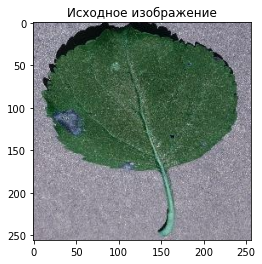

In [36]:
plt.imshow(img)
plt.title("Исходное изображение")
plt.show()

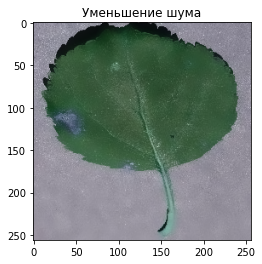

In [38]:
res_0 = cv.imread ("bl.png")
plt.imshow(res_0)
plt.title("Уменьшение шума")
plt.show()

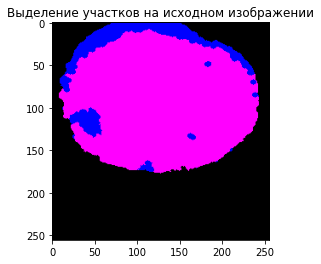

In [39]:
plt.imshow(res_1)
plt.title("Выделение участков на исходном изображении")
plt.show()

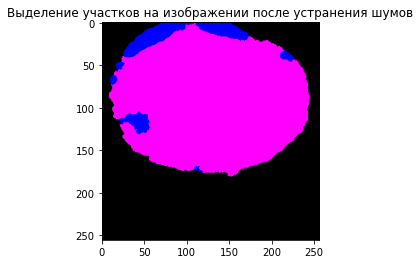

In [40]:
plt.imshow(res_2)
plt.title("Выделение участков на изображении после устранения шумов")
plt.show()

In [41]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(res_1, 15, 75, 75)
cv.imwrite("res_3.png", bilateral)

True

Итог
    
Выделение поврежденных участков листа лучше производить на исходном изображении. Наличие шума для данной операции не является проблемой. Если же сначала устранить шум, а затем произвести выделение поврежденных участков, то в результате будут отображены только сильные повреждения. 